In [1]:
from yahoo_finance import Share
import csv
import numpy as np
import pandas as pd

In [2]:
Technology=['GOOGL','FB','BIDU','LNKD','TWTR','ORCL','SAP','ADBE','IBM','MSFT','CSCO','T','VZ','NTT']
Finance=['WFC','JPM','BAC','C','BRK-B','AIG','HSBC','V','AXP','MA','GS','SCHW']
Services=['DIS','CMCSA','TWX','BABA','TWC','WMT','COST','TGT','HD','TGT','PCLN']
Healthcare =['JNJ','NVS','PFE','MRK','GSK','BMY','GILD','AMGN','UNH','AET','CVS']
Consumer =['AAPL','PG','UN','UL','TM','HMC','F','GM','KO','PEP','BUD','ABEV']

In [3]:
List=Technology+Finance+Services+Healthcare+Consumer
len(List)

60

In [ ]:
Out= pd.DataFrame()
count=0
for l in List:
    Stock=Share(l)
    Stock_t = Stock.get_historical('2011-01-01', '2016-01-01')
    Stock_df=pd.DataFrame(Stock_t)
    Out['Date']=Stock_df.Date
    Out[l]=Stock_df.Close
    count=count+1
    #print count

In [46]:
Out.to_csv('5sectors.csv', index=False)

In [4]:
Out1=pd.read_csv('5sectors.csv')
Out_rev=Out1.reindex(index=Out1.index[::-1])   # This is an important observation Out_rev = dataframe
from matplotlib import pyplot as plt
%matplotlib inline 


def plot6(List,Out_rev):
#plt.subplots_adjust(wspace=0.01, hspace=0.01)
    f, axs = plt.subplots(2,3,figsize=(15,8))
    for list1 in List[1:12]:
        plt.subplot(2,3,1)
        plt.plot(Out_rev[list1])
    plt.title('Tech')
    
    for list1 in List[12:23]:
        plt.subplot(2,3,2)
        plt.plot(Out_rev[list1])
    plt.title('Finance')

    for list1 in List[24:35]:
        plt.subplot(2,3,3)
        plt.plot(Out_rev[list1])  
    plt.title('Services')

    for list1 in List[36:48]:
        plt.subplot(2,3,4)
        plt.plot(Out_rev[list1])    
    plt.title('Healthcare')
    
    for list1 in List[50:60]:
        plt.subplot(2,3,5)
        plt.plot(Out_rev[list1])
    plt.title('Consumer')
    
    for list1 in List[1:60]:
        plt.subplot(2,3,6)
        plt.plot(Out_rev[list1])
    plt.title('All')    

    
  

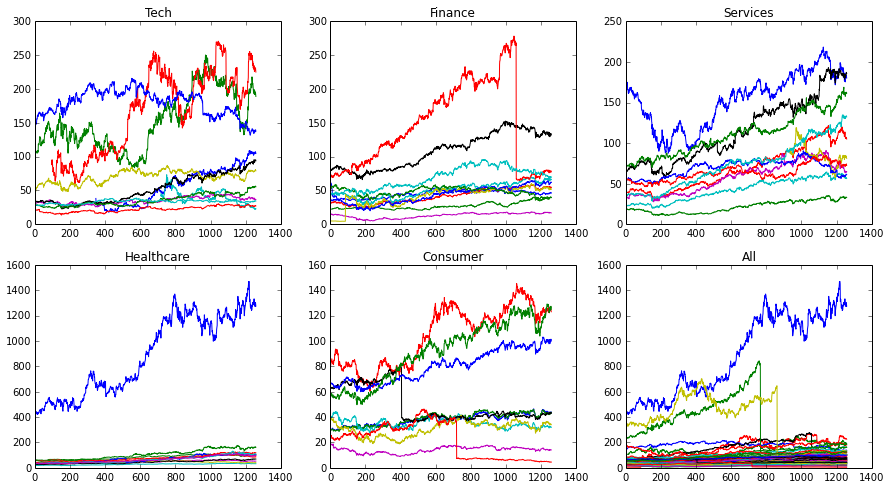

In [5]:
plot6(List,Out_rev)
Out_diff=Out_rev.fillna(value=0).sort(columns='Date').set_index('Date').diff().fillna(value=0)

In [77]:
#plot6(List,Out_diff)

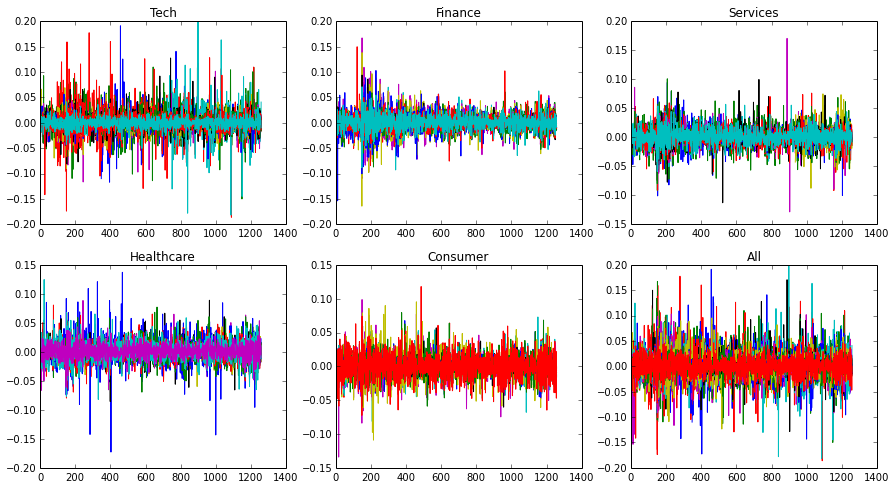

In [7]:
Out_pct=Out_rev.fillna(value=0).sort(columns='Date').set_index('Date').pct_change().fillna(value=0)
#plot6(List,Out_pct.apply(threshold))
Out_pct1=Out_pct.applymap(threshold)
plot6(List,Out_pct.applymap(threshold))

In [6]:
def threshold(x):
    if (x>=0.2 or x<=-0.2):
        return x*0
    else: 
        return x

Weekly heatmaps


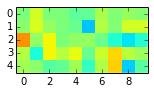

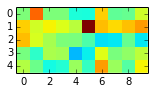

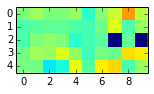

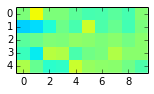

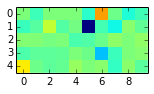

In [10]:
# You need to change parameter List
import time 
import matplotlib.pyplot as plt
import numpy as np
Sectors = ['Technology', 'Finance','Services','Healthcare','Consumer']
Companies=[1,2,3,4,5,6,7,8,9,10]

print "Weekly heatmaps"
fig = plt.figure()
for i in range (0,5):  
    data = np.asarray(get_hmap(List_hmap,(i+1),Out_pct1))   
    plt.subplot(3,2,i+1)
    plt.imshow(data,interpolation='none',vmin=-0.06, vmax=0.06)
    #plt.colorbar()   
    plt.show()
    

In [9]:
# This is List 
List_hmap=Technology[1:11]+Finance[0:10]+Services[0:10]+Healthcare[0:10]+Consumer[0:10]
def get_hmap(List,date,Out_rev):
    count=1
    l=[]
    m=[]
    for list1 in List:
        k= Out_rev[list1]
        l.append(k[date])
        if (count%10==0):
            m.append(l)
            l=[]
        count=count+1
    return m

In [104]:
#Out_rev['FB']

In [11]:
import scipy as sp
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

class Estimator(sk.base.BaseEstimator, sk.base.RegressorMixin):
    """
    A shell estimator that combines a transformer and regressor into a single object.
    """
    def __init__(self, transformer, model):
        self.transformer = transformer
        self.model = model
        pass

    def fit(self, X, y):
        X_trans = self.transformer.fit(X).transform(X)
        self.model.fit(X_trans, y)
        return self
    
    def score(self, X, y):
        X_test = self.transformer.transform(X)
        return self.model.score(X_test, y)

    def predict(self, X):
        X_test = self.transformer.transform(X)
        return self.model.predict(X_test)
    
class Transformer(sk.base.BaseEstimator, sk.base.TransformerMixin):
    """
    Returns the first k columns of a feature array
    """
    def __init__(self):
        pass

    def fit(self, X):  
        return self

    def df_to_list(self,X):
        l=[]
        for num in X:
            l.append(num)  
        return l
    
    def transform(self, X):
        input=[]
        for i in range (0,len(X)-100):
            input.append((X[i:i+99]))
        return input   

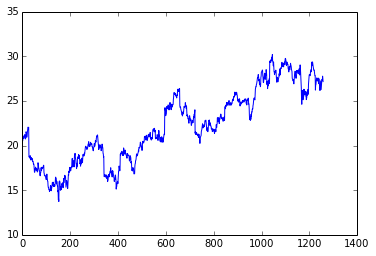

In [12]:
t=Transformer()
l= t.df_to_list(Out_rev[List[10]])
l1=t.transform(Out_rev[List[10]])
plt.plot(l)

In [13]:
#Define conversion dataframe to list 
def df_to_list(X):
    l=[]
    for num in X:
        l.append(num)  
    return l

In [14]:
l=[]
X=Out_rev[List[5]]
for num in X:
    l.append(num)  
    

In [15]:
y=l[99:len(l)-1]
x=l

In [16]:
Forecasting_mechanisms =['Linear Regression','ARIMA','LMS','Kalman Filter','ANN']

In [17]:
from sklearn.linear_model import LinearRegression
shell = Estimator(Transformer(), LinearRegression(fit_intercept=True))
#from sklearn.neural_network import MLPClassifier
#shell = Estimator(Transformer(), ARIMA(fit_intercept=True))
#shell = Estimator(Transformer(), Ridge(fit_intercept=True))
#shell = Estimator(Transformer(), LMS(fit_intercept=True))
#shell = Estimator(Transformer(), Ne(fit_intercept=True))

In [19]:
shell.fit(x[0:800],y[0:700])

Estimator(model=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
     transformer=Transformer())

In [20]:
y_pred=shell.predict(x[701:])

In [22]:
y_test=y[701:]

In [33]:
np.mean(abs(y_pred-y_test))

0.40757461499973802

ERROR


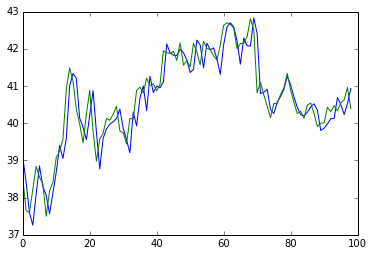

In [23]:
plt.plot(y_pred[1:100])
plt.plot(y_test[1:100])
print "ERROR"

In [36]:
tra=t.transform(x[0:800])

MSE


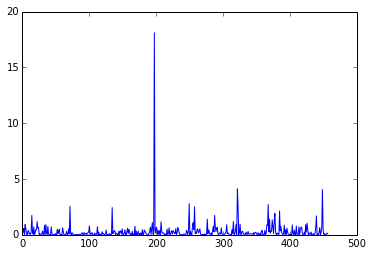

In [43]:
plt.plot(abs(y_pred-y_test)*abs(y_pred-y_test))
print "MSE" 

In [44]:
y_pred=shell.predict(x[701:802])

In [313]:
#y_pred=shell.predict(x[702:802]+[y_pred])

In [353]:
x=l

In [24]:
# Multi step prediction 
x=x[701:802]
y_pred=shell.predict(x)
print y_pred
for i in range(0,10):
    x=x[1:]+[y_pred]
    y_pred=shell.predict(x)
    print y_pred
#for i in range(0,10):
    #y_pred=shell.predict(x[701+i:802]+[y_pred])

[ 38.75817468]
[ 39.09500604]
[ 38.41030127]
[ 38.68701437]
[ 38.81711066]
[ 38.24051732]
[ 38.55051867]
[ 38.59010599]
[ 38.04208332]
[ 38.56444005]
[ 38.64453972]


Projected heatmaps


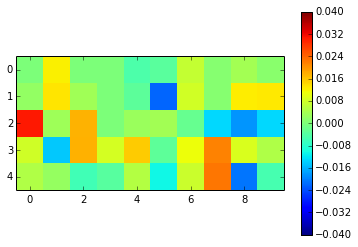

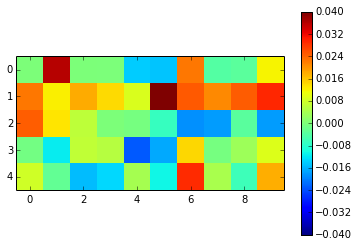

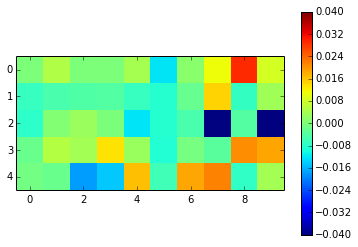

In [25]:
# You need to change parameter List
import time 
import matplotlib.pyplot as plt
import numpy as np
Sectors = ['Technology', 'Finance','Services','Healthcare','Consumer']
Companies=[1,2,3,4,5,6,7,8,9,10]

print "Projected heatmaps"
fig = plt.figure()
for i in range (0,3):  
    data = np.asarray(get_hmap(List_hmap,(i+1),Out_pct1))   
    #plt.subplot(2,2,i+1)
    plt.imshow(data,interpolation='none',vmin=-0.04, vmax=0.04)
    plt.colorbar()   
    plt.show()

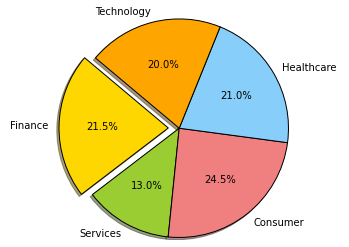

In [26]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Finance', 'Services', 'Consumer', 'Healthcare' , 'Technology'
sizes = [215, 130, 245, 210,200]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

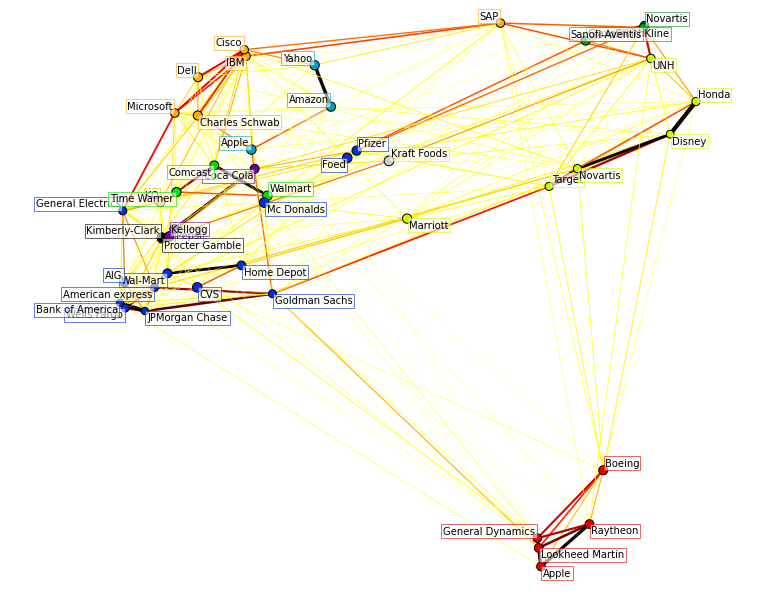

In [27]:
from graph import *

In [28]:
Invest=100
weights = np.random.rand(5,10)
rebalance_frequency = 10
total_days=300
#Out_rev

,Date,GOOGL,FB,BIDU,LNKD,TWTR,ORCL,SAP,ADBE,IBM,...,UN,UL,TM,HMC,F,GM,KO,PEP,BUD,ABEV
1257,2011-01-03,604.350009,NaN,99.730003,NaN,NaN,31.620001,51.250000,31.290001,147.479996,...,31.719999,31.030001,79.430000,40.020000,17.250000,37.060001,65.220001,65.750000,57.630001,26.650000
1256,2011-01-04,602.120002,NaN,100.970001,NaN,NaN,31.480000,51.080002,31.510000,147.639999,...,31.540001,30.920000,79.860001,39.599998,17.379999,37.900002,63.869999,65.410004,57.340000,26.220000
1255,2011-01-05,609.070016,NaN,104.629997,NaN,NaN,31.040001,50.340000,32.220001,147.050003,...,31.059999,30.520000,80.199997,39.189999,17.889999,38.070000,63.490002,66.589996,56.820000,25.860000
1254,2011-01-06,613.500030,NaN,105.160004,NaN,NaN,31.170000,49.740002,32.270000,148.660004,...,30.510000,30.090000,81.540001,38.959999,18.219999,38.900002,63.029999,66.839996,57.070000,25.480001
1253,2011-01-07,616.440019,NaN,106.949997,NaN,NaN,31.030001,49.349998,32.040001,147.929993,...,30.150000,29.760000,82.459999,39.110001,18.270000,38.980000,62.919998,66.389999,56.599998,25.060000
1252,2011-01-10,614.210012,NaN,105.980003,NaN,NaN,31.040001,48.759998,32.959999,147.639999,...,30.010000,29.660000,82.769997,39.110001,18.309999,38.560001,63.060001,66.050003,56.610001,25.000000
1251,2011-01-11,616.010029,NaN,106.279999,NaN,NaN,30.990000,50.279999,32.980000,147.279999,...,30.090000,29.770000,83.379997,39.369999,18.280001,38.750000,62.689999,66.330002,57.040001,25.400000
1250,2011-01-12,616.870008,NaN,105.930000,NaN,NaN,30.940001,51.180000,33.570000,149.100006,...,30.330000,30.020000,84.440002,40.110001,18.709999,38.619999,63.040001,66.730003,58.110001,24.610000
1249,2011-01-13,616.690013,NaN,106.250000,NaN,NaN,31.180000,54.580002,33.380001,148.820007,...,30.350000,29.990000,85.389999,40.419998,18.680000,38.270000,63.400002,66.910004,58.680000,24.370000
1248,2011-01-14,624.180013,NaN,107.730003,NaN,NaN,31.250000,53.599998,33.790001,150.000000,...,30.570000,30.190001,85.959999,40.740002,18.650000,38.200001,63.130001,66.779999,57.910000,23.199999


In [29]:
Out_clean=Out_rev.fillna(value=0).sort(columns='Date').set_index('Date')

In [30]:
from cumulative import *

In [32]:
A=Cumulative()

In [33]:
A.calculate_random(Invest,weights,rebalance_frequency,total_days)

[100, 102.9, 99.7, 94.8, 96.2, 103.2, 111.3, 109.2, 104.3]

In [7]:
A.calculate_rebalancer(Invest,weights,rebalance_frequency,total_days)

[100, 101.2, 99.7, 99.2, 100.1, 103.2, 106.9, 104.2, 102.3]

In [8]:
A.calculate_prediction(Invest,weights,rebalance_frequency,total_days)

[100, 102.9, 101.7, 103.4, 99.9, 105.2, 112.3, 115.2, 109.9]